<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.277849,33.698513,22.278563,-1022.276459,-920.021533,2777.530868,-3697.552401
1,0.0,1.0,71.303133,68.723889,72.243998,-1029.060277,-806.789257,-963.462068,156.672811
2,0.0,2.0,94.354353,49.043426,57.249191,-3495.201934,-3284.554963,881.402545,-4165.957508
3,0.0,3.0,46.948350,49.771017,61.516974,3814.587307,3982.823648,-431.639006,4414.462654
4,0.0,4.0,83.440051,86.095215,29.612178,18127.904084,18337.051529,2799.538655,15537.512873
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.541199,84.852835,76.464596,-2061.906745,-1794.048114,21.249416,-1815.297530
19996,999.0,16.0,36.785156,88.161506,74.835889,-5413.062117,-5203.279567,-2321.427158,-2881.852409
19997,999.0,17.0,86.263984,84.726792,91.646824,8845.881269,9118.518869,-25.362416,9143.881285
19998,999.0,18.0,71.164899,47.106123,20.358857,1099.715019,1248.344898,-552.634631,1800.979529


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    36.277849  33.698513  22.278563  -1022.276459   -920.021533   
      1.0    71.303133  68.723889  72.243998  -1029.060277   -806.789257   
      2.0    94.354353  49.043426  57.249191  -3495.201934  -3284.554963   
      3.0    46.948350  49.771017  61.516974   3814.587307   3982.823648   
      4.0    83.440051  86.095215  29.612178  18127.904084  18337.051529   
...                ...        ...        ...           ...           ...   
999.0 15.0   96.541199  84.852835  76.464596  -2061.906745  -1794.048114   
      16.0   36.785156  88.161506  74.835889  -5413.062117  -5203.279567   
      17.0   86.263984  84.726792  91.646824   8845.881269   9118.518869   
      18.0   71.164899  47.106123  20.358857   1099.715019   1248.344898   
      19.0   75.981087  76.815826  84.797343   1759.886295   2007.480552   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    2777.530868  -3697.552401  
      1.0    -963.462068    156.672811  
      2.0     881.402545  -4165.957508  
      3.0    -431.639006   4414.462654  
      4.0    2799.538655  15537.512873  
...                  ...           ...  
999.0 15.0     21.249416  -1815.297530  
      16.0  -2321.427158  -2881.852409  
      17.0    -25.362416   9143.881285  
      18.0   -552.634631   1800.979529  
      19.0   -222.065358   2229.545910  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    36.277849  33.698513  22.278563  -1022.276459   -920.021533   
      1.0    71.303133  68.723889  72.243998  -1029.060277   -806.789257   
      2.0    94.354353  49.043426  57.249191  -3495.201934  -3284.554963   
      3.0    46.948350  49.771017  61.516974   3814.587307   3982.823648   
      4.0    83.440051  86.095215  29.612178  18127.904084  18337.051529   
...                ...        ...        ...           ...           ...   
999.0 15.0   96.541199  84.852835  76.464596  -2061.906745  -1794.048114   
      16.0   36.785156  88.161506  74.835889  -5413.062117  -5203.279567   
      17.0   86.263984  84.726792  91.646824   8845.881269   9118.518869   
      18.0   71.164899  47.106123  20.358857   1099.715019   1248.344898   
      19.0   75.981087  76.815826  84.797343   1759.886295   2007.480552   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    2777.530868  -3697.552401  
      1.0    -963.462068    156.672811  
      2.0     881.402545  -4165.957508  
      3.0    -431.639006   4414.462654  
      4.0    2799.538655  15537.512873  
...                  ...           ...  
999.0 15.0     21.249416  -1815.297530  
      16.0  -2321.427158  -2881.852409  
      17.0    -25.362416   9143.881285  
      18.0   -552.634631   1800.979529  
      19.0   -222.065358   2229.545910  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.277849,33.698513,22.278563,-1022.276459,-920.021533,2777.530868,-3697.552401
1,0.0,1.0,71.303133,68.723889,72.243998,-1029.060277,-806.789257,-963.462068,156.672811
2,0.0,2.0,94.354353,49.043426,57.249191,-3495.201934,-3284.554963,881.402545,-4165.957508
3,0.0,3.0,46.948350,49.771017,61.516974,3814.587307,3982.823648,-431.639006,4414.462654
4,0.0,4.0,83.440051,86.095215,29.612178,18127.904084,18337.051529,2799.538655,15537.512873
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.541199,84.852835,76.464596,-2061.906745,-1794.048114,21.249416,-1815.297530
19996,999.0,16.0,36.785156,88.161506,74.835889,-5413.062117,-5203.279567,-2321.427158,-2881.852409
19997,999.0,17.0,86.263984,84.726792,91.646824,8845.881269,9118.518869,-25.362416,9143.881285
19998,999.0,18.0,71.164899,47.106123,20.358857,1099.715019,1248.344898,-552.634631,1800.979529


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    36.277849  33.698513  22.278563  -1022.276459   -920.021533   
      1.0    71.303133  68.723889  72.243998  -1029.060277   -806.789257   
      2.0    94.354353  49.043426  57.249191  -3495.201934  -3284.554963   
      3.0    46.948350  49.771017  61.516974   3814.587307   3982.823648   
      4.0    83.440051  86.095215  29.612178  18127.904084  18337.051529   
...                ...        ...        ...           ...           ...   
999.0 15.0   96.541199  84.852835  76.464596  -2061.906745  -1794.048114   
      16.0   36.785156  88.161506  74.835889  -5413.062117  -5203.279567   
      17.0   86.263984  84.726792  91.646824   8845.881269   9118.518869   
      18.0   71.164899  47.106123  20.358857   1099.715019   1248.344898   
      19.0   75.981087  76.815826  84.797343   1759.886295   2007.480552   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    2777.530868  -3697.552401  
      1.0    -963.462068    156.672811  
      2.0     881.402545  -4165.957508  
      3.0    -431.639006   4414.462654  
      4.0    2799.538655  15537.512873  
...                  ...           ...  
999.0 15.0     21.249416  -1815.297530  
      16.0  -2321.427158  -2881.852409  
      17.0    -25.362416   9143.881285  
      18.0   -552.634631   1800.979529  
      19.0   -222.065358   2229.545910  

[20000 rows x 7 columns]

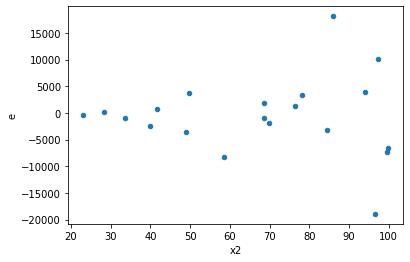

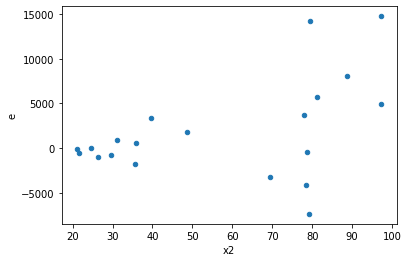

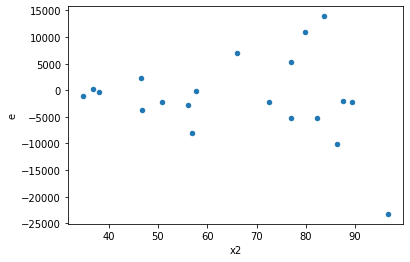

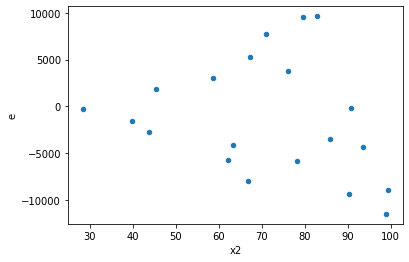

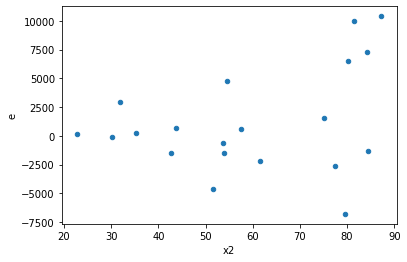

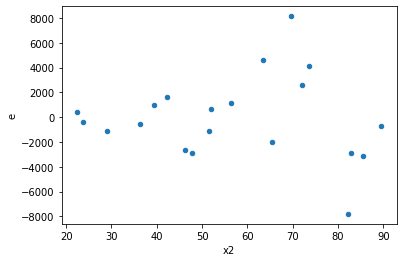

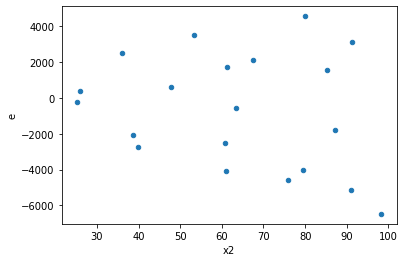

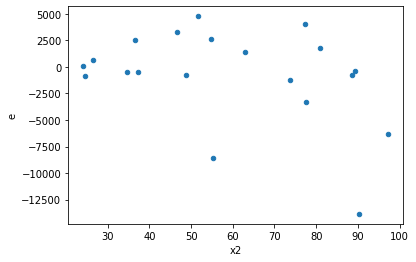

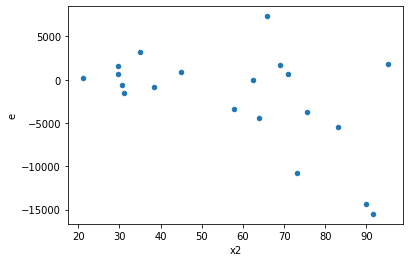

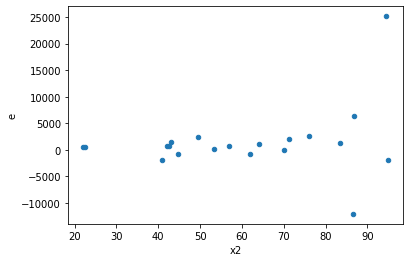

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,5.0,9.0,73799474.38889474,394793965.39621216,14759894.877778947,43865996.155134685,2.971972125707686,0.14829376106983805,0.925853119465081,0.07414688053491902,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,91686276.39558828,126784405.80807656,13098039.48508404,18112057.972582366,1.3828067928187464,0.6796765778387941,0.660161711080603,0.33983828891939705,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,51544175.33765342,89239657.84617053,6443021.917206678,14873276.307695089,2.308431741940012,0.32390030831951244,0.8380498458402438,0.16195015415975622,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,84289442.05349472,139506862.394514,10536180.25668684,23251143.732419,2.206790617279212,0.35051069254598866,0.8247446537270057,0.17525534627299433,Reject001=1 : Homoscedasticity
9.0,8.0,6.0,9335868.381457264,477048123.8231796,1166983.547682158,79508020.6371966,68.13122669562397,5.0380645423730996e-05,0.9999748096772881,2.5190322711865498e-05,Reject001=0 : Heteroscedasticity
11.0,8.0,6.0,127315215.53440551,169566455.88141716,15914401.94180069,28261075.98023619,1.7758176577157945,0.5000625077617831,0.7499687461191085,0.25003125388089154,Reject001=1 : Homoscedasticity
14.0,2.0,12.0,7156603.504016561,537323758.3119318,3578301.7520082807,44776979.85932765,12.51347230126612,0.002317449152608786,0.9988412754236956,0.001158724576304393,Reject001=0 : Heteroscedasticity
15.0,10.0,4.0,146738058.19678992,384468898.1449874,14673805.819678992,96117224.53624685,6.550258720702462,0.08507386225674463,0.9574630688716277,0.04253693112837231,Reject001=1 : Homoscedasticity
16.0,9.0,5.0,66173225.60771763,110320616.43239819,7352580.623079737,22064123.286479637,3.0008679153031514,0.23893746092745594,0.880531269536272,0.11946873046372797,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,6.0,514593536.73980737,192107009.86523584,64324192.09247592,32017834.977539305,0.4977572812964171,0.355425032455872,Reject001=1 : Homoscedasticity
1.0,11.0,3.0,140871048.8196407,40494.068836305945,12806458.9836037,13498.022945435316,0.0010540011850830144,2.956616809278143e-13,Reject001=0 : Heteroscedasticity
2.0,10.0,4.0,421948992.73547435,8302540.904565147,42194899.27354743,2075635.2261412868,0.04919161467088822,0.00017175852724796126,Reject001=0 : Heteroscedasticity
3.0,5.0,9.0,73799474.38889474,394793965.39621216,14759894.877778947,43865996.155134685,2.971972125707686,0.14829376106983805,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,91686276.39558828,126784405.80807656,13098039.48508404,18112057.972582366,1.3828067928187464,0.6796765778387941,Reject001=1 : Homoscedasticity
5.0,11.0,3.0,99878415.26799402,7525508.820940178,9079855.933454001,2508502.940313393,0.27627122706551044,0.09775698276765775,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,51544175.33765342,89239657.84617053,6443021.917206678,14873276.307695089,2.308431741940012,0.32390030831951244,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,84289442.05349472,139506862.394514,10536180.25668684,23251143.732419,2.206790617279212,0.35051069254598866,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,353826944.9390316,11168720.618162949,44228368.11737895,1861453.4363604914,0.04208731896732717,0.00021925032723754033,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      717
Reject001=0 : Heteroscedasticity    283
Name: Result_test, dtype: int64